In [2]:
from manim import *
import math
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching partial_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s partial_Scene"

video_index_scene = " -v WARNING --progress_bar None --disable_caching partial_index_Scene"
image_index_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s partial_index_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.11


Output saved by creating file at animations/partial_differentiation/partial.mp4.


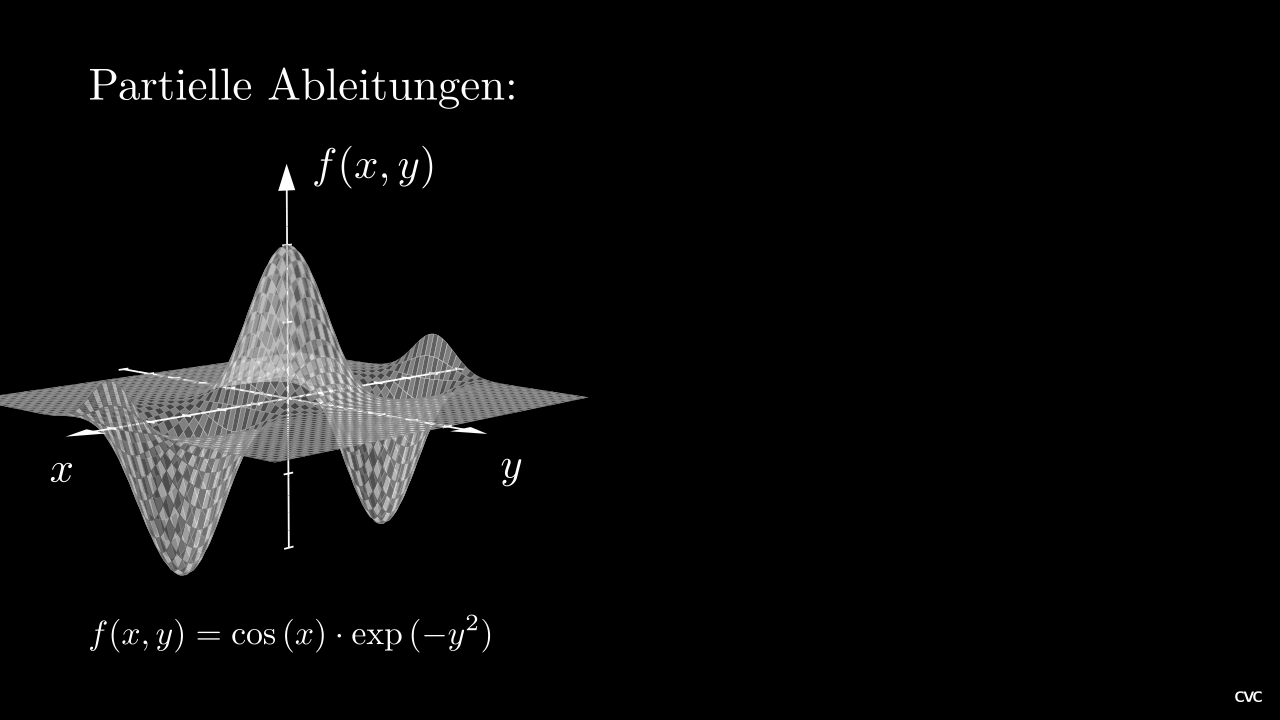

In [175]:
%%capture_video --path "animations/partial_differentiation/partial.mp4"
%%manim -qm --fps 60 $video_scene

class partial_Scene(ThreeDScene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        text_head = Tex(r"Partielle Ableitungen:", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT + 0.25 * DOWN)


        # 3D-Coordinate System
        CO3D = [-5.5, -0, -8]
        CO3D_x_range = (-6, 6, 1)
        CO3D_y_range = (-6, 6, 1)
        CO3D_z_range = (-1, 1.5, 0.5)
        ax = ThreeDAxes(
            x_range = CO3D_x_range, y_range = CO3D_y_range, z_range = CO3D_z_range,
            x_length = 8, y_length = 8, z_length = 6, axis_config = {'tip_length': 0.05, 'tip_width': 0.3}, 
            z_axis_config = {'color': WHITE},
            ).move_to(CO3D).rotate(
                axis = [1, 0, 0], angle = 6*PI/4
                ).rotate(
                    axis = [0, 1, 0], angle = 5*PI/4
                    ).rotate(axis = [1, 0, 0], angle = PI/20).rotate(
                        axis = [0, 1, 0], angle = PI/20
                        )
        x_lab = Tex('$x$', font_size = 64).move_to(CO3D).shift(1.75*DOWN + 3.5*LEFT)
        y_lab = Tex('$y$', font_size = 64).move_to(CO3D).shift(1.75*DOWN + 3.5*RIGHT)
        z_lab = Tex('$f(x,y)$', font_size = 64).move_to(CO3D + 0.5*RIGHT).shift(3*UP + 0.85*RIGHT)
        ax_3D = VGroup(ax, x_lab, y_lab, z_lab)#.set_opacity(0.5)


        # surface plane
        def param_surface(x, y):
            #z = 5 * np.exp(-(4*(x+1)**2 + y**2))
            z = np.cos(x) * np.exp(-y**2)
            return np.array([x, y, z])

        
        def param_surface_ax(x, y):
            return ax.c2p(x, y, param_surface(x, y)[2])

        resolution_fa = 64
        surface_plane = Surface(
            param_surface_ax,
            resolution = (resolution_fa, resolution_fa),
            v_range=[-5, +5],
            u_range=[-5, +5]
            )
        surface_plane.set_style(fill_opacity = 1, stroke_color = GREY)
        surface_plane.set_fill_by_checkerboard(GREY, WHITE, opacity = 0.5)

        surface_eq1 = MathTex(r'f(x,y)=\cos{(x)}\cdot\exp{(-y^2)}', font_size = 36).align_on_border(LEFT + DOWN).shift(0.25*UP + 0.5*RIGHT)

        self.add(text_head)
        self.add(ax_3D)
        self.add(surface_plane)
        self.add(surface_eq1)